In [1]:
library('tidyverse')

org_opts <- options()

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
read_csv('../clinical_metadata.csv')

Rows: 11 Columns: 7
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Specimen ID, Sample id, primary/recurrence, central/conventional, M...
dbl (2): age, grade

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Specimen ID,Sample id,age,primary/recurrence,grade,central/conventional,Margin
<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
0-20-100-00479,S10-479,NA,primary,3,central,M0
1-20-140-11208,S14-11208,69,primary,3,central,M1
1-20-150-16380,S15-16380,59,recurrence,2,central,M0
1-20-140-09996,S14-9996,103,primary,3,central,M2
1- S-17-0004703,S17-4703,44,primary,2,conventional,NA
NMS22-28934,NMS22-28934,50,primary,3,conventional,M0
0-20-080-25548,S08-25548,62,primary,NA,conventional,M2
NMS22-13453,NMS22-13453,50,primary,2,NA,NA
NMS23-00471,NMS23-471,56,primary,2,conventional,M0


In [3]:
all_trb_files <-
    list.files('NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result/', recursive=TRUE, pattern='.clones_TRB', full.names=TRUE)

all_trb_files

[1] "NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//1_113026/1_113026.clones_TRB.tsv"  
 [2] "NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//10_113046/10_113046.clones_TRB.tsv"
 [3] "NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//11_113047/11_113047.clones_TRB.tsv"
 [4] "NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//2_113030/2_113030.clones_TRB.tsv"  
 [5] "NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//3_113032/3_113032.clones_TRB.tsv"  
 [6] "NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//4_113033/4_113033.clones_TRB.tsv"  
 [7] "NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//5_113034/5_113034.clones_TRB.tsv"  
 [8] "NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//6_113037/6_113037.clones_TRB.tsv"  
 [9] "NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//7_113038/7_113038.clones_TRB.tsv"  
[10] "NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//8_113042/8_113042.clones_TRB.tsv"  
[11] "NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//9_113044/9_113044.clones_TRB.tsv"

In [4]:
all_trb_files_tbl <-
    tibble(`file_path`=all_trb_files) %>%
    mutate(
        `file_name`=str_replace_all(`file_path`, '.*/', ''),
        `cellecta_sample_name`=str_replace_all(`file_name`, '\\..*', '')
    )

all_trb_files_tbl

file_path,file_name,cellecta_sample_name
<chr>,<chr>,<chr>
NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//1_113026/1_113026.clones_TRB.tsv,1_113026.clones_TRB.tsv,1_113026
NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//10_113046/10_113046.clones_TRB.tsv,10_113046.clones_TRB.tsv,10_113046
NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//11_113047/11_113047.clones_TRB.tsv,11_113047.clones_TRB.tsv,11_113047
NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//2_113030/2_113030.clones_TRB.tsv,2_113030.clones_TRB.tsv,2_113030
NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//3_113032/3_113032.clones_TRB.tsv,3_113032.clones_TRB.tsv,3_113032
NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//4_113033/4_113033.clones_TRB.tsv,4_113033.clones_TRB.tsv,4_113033
NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//5_113034/5_113034.clones_TRB.tsv,5_113034.clones_TRB.tsv,5_113034
NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//6_113037/6_113037.clones_TRB.tsv,6_113037.clones_TRB.tsv,6_113037
NWU_101176_FFPE_DNA_data_release/data_release/03_mixcr_assemble_result//7_113038/7_113038.clones_TRB.tsv,7_113038.clones_TRB.tsv,7_113038


In [5]:
all_trb_combined_tbl <-
    all_trb_files_tbl %>%
    pull(`file_path`) %>%
    map_df(function(one_file_path) {
        read_tsv(one_file_path, show_col_types=FALSE) %>%
            mutate(`file_path`=one_file_path)
    }) %>%
    left_join(all_trb_files_tbl, by='file_path') %>%
    select(-`file_path`, `file_name`) %>%
    relocate(`cellecta_sample_name`)

all_trb_combined_tbl %>%
    head()

cellecta_sample_name,cloneId,readCount,readFraction,uniqueMoleculeCount,uniqueMoleculeFraction,targetSequences,targetQualities,allVHitsWithScore,allDHitsWithScore,⋯,allCHitsWithScore,allVAlignments,allDAlignments,allJAlignments,allCAlignments,nSeqCDR3,minQualCDR3,aaSeqCDR3,refPoints,file_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1_113026,48,105942,0.021064612,7,0.0017623364,TGTGCCAGCAGTGACTACGGGTTAGTACAGTTCTTC,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRBV6-4*00(589.1),NA,⋯,NA,438|454|475|0|16||160.0,NA,33|42|70|27|36||90.0,NA,TGTGCCAGCAGTGACTACGGGTTAGTACAGTTCTTC,58,CASSDYGLVQFF,:::::::::0:-1:16:::::27:-13:36:::,1_113026.clones_TRB.tsv
1_113026,32,49504,0.009842957,10,0.0025176234,TGTGCCAGCAGTTACGCGGTCGACTCCTACAATGAGCAGTTCTTC,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,"TRBV6-5*00(323),TRBV6-8*00(322.8)",NA,⋯,NA,439|457|476|0|18|ST454G|151.0;432|450|469|0|18|ST447G|151.0,NA,20|42|70|23|45||220.0,NA,TGTGCCAGCAGTTACGCGGTCGACTCCTACAATGAGCAGTTCTTC,58,CASSYAVDSYNEQFF,:::::::::0:1:18:::::23:0:45:::,1_113026.clones_TRB.tsv
1_113026,59,45571,0.009060952,6,0.0015105740,TGTGCCAGCAGCTTAGTGCTCGGGAACAATGAGCAGTTCTTC,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRBV7-2*00(743),"TRBD1*00(25),TRBD2*00(25)",⋯,NA,500|520|537|0|20|SC516T|171.0,11|16|36|20|25||25.0;15|20|48|20|25||25.0,25|42|70|25|42||170.0,NA,TGTGCCAGCAGCTTAGTGCTCGGGAACAATGAGCAGTTCTTC,58,CASSLVLGNNEQFF,:::::::::0:3:20:20:1:-8:25:25:-5:42:::,1_113026.clones_TRB.tsv
1_113026,126,39337,0.007821437,4,0.0010070493,TGCAGCGTCAACGGACAGGGGGCGGGCTACACCTTC,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRBV29-1*00(458.9),TRBD1*00(60),⋯,NA,620|628|654|0|8||80.0,13|25|36|12|24||60.0,28|40|68|24|36||120.0,NA,TGCAGCGTCAACGGACAGGGGGCGGGCTACACCTTC,58,CSVNGQGAGYTF,:::::::::0:-6:8:12:-1:1:24:24:-8:36:::,1_113026.clones_TRB.tsv
1_113026,3054,37827,0.007521201,1,0.0002517623,TGTGCCAGCAGTTACTCGGGTGGTAAGGGCTACACCTTC,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV6-6*00(331.3),NA,⋯,NA,436|457|473|0|21|SA454G|181.0,NA,28|40|68|27|39||120.0,NA,TGTGCCAGCAGTTACTCGGGTGGTAAGGGCTACACCTTC,45,CASSYSGGKGYTF,:::::::::0:4:21:::::27:-8:39:::,1_113026.clones_TRB.tsv
1_113026,3281,37103,0.007377247,1,0.0002517623,TGTGCCAGCAGTGTCGCTGGACCACCCCTCCACTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV6-1*00(519.1),NA,⋯,NA,436|449|473|0|13||130.0,NA,31|45|73|22|36||140.0,NA,TGTGCCAGCAGTGTCGCTGGACCACCCCTCCACTTT,45,CASSVAGPPLHF,:::::::::0:-4:13:::::22:-11:36:::,1_113026.clones_TRB.tsv


In [6]:
cpk_tbl <-
    all_trb_combined_tbl %>%
    group_by(`cellecta_sample_name`) %>%
    summarize(
        `ucdr3_cnt`=`aaSeqCDR3` %>% unique() %>% length(),
        `kiloreads`=sum(`readCount`)/1000,
        .groups='drop'
    ) %>%
    mutate(`CPK`=`ucdr3_cnt`/`kiloreads`) %>%
    arrange(`CPK`)

cpk_tbl

cellecta_sample_name,ucdr3_cnt,kiloreads,CPK
<chr>,<int>,<dbl>,<dbl>
4_113033,311,5611.758,0.05541935
6_113037,254,3600.901,0.07053790
11_113047,322,2915.756,0.11043448
3_113032,1329,5458.755,0.24346211
10_113046,728,2529.859,0.28776307
8_113042,899,3102.778,0.28974036
9_113044,1571,4957.072,0.31692096
1_113026,3119,5029.383,0.62015559
7_113038,4304,3481.262,1.23633326


In [7]:
cpk_tbl %>%
    pull(`CPK`) %>%
    summary()

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.05542  0.17695  0.28974  7.41703  0.92824 72.17338 

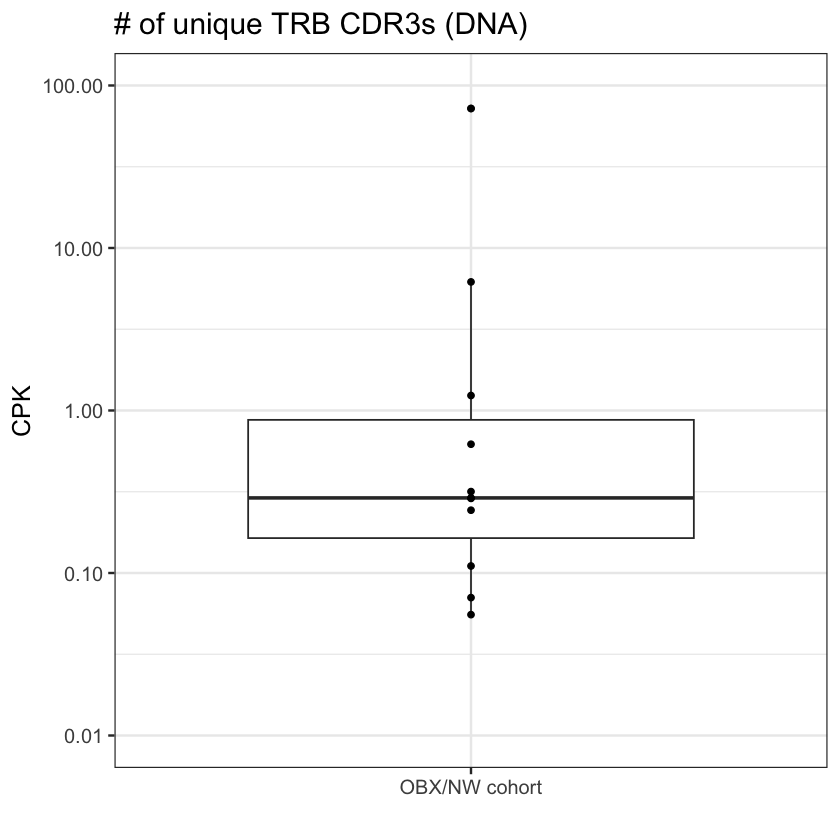

In [8]:
cpk_tbl %>%
    ggplot(aes(x='OBX/NW cohort', y=`CPK`)) +
        geom_boxplot() +
        geom_point() +
        scale_y_log10(limits=c(0.01, 100), labels=scales::comma) +
        theme_bw(base_size=15) +
        labs(
            title='# of unique TRB CDR3s (DNA)',
            x=''
        )